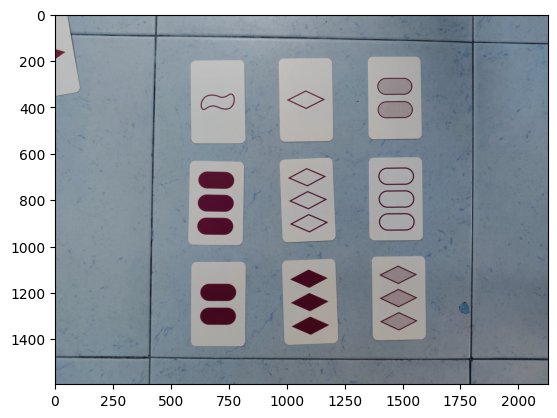

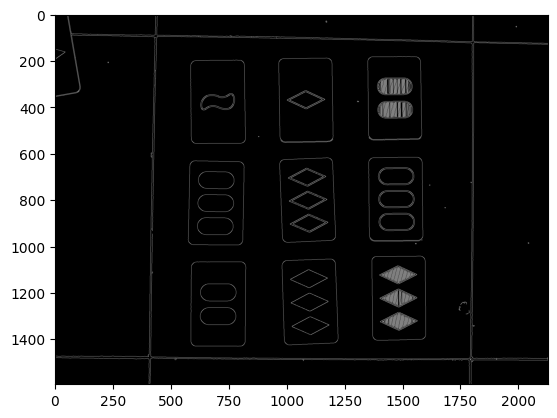

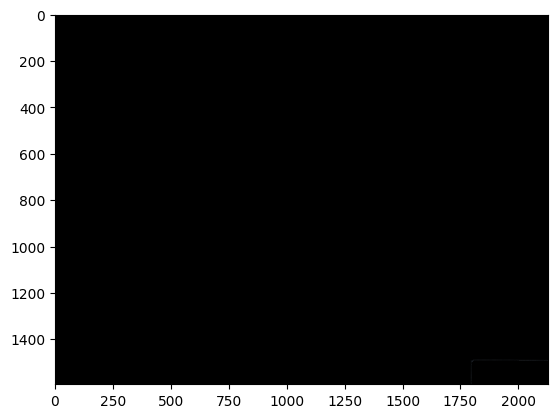

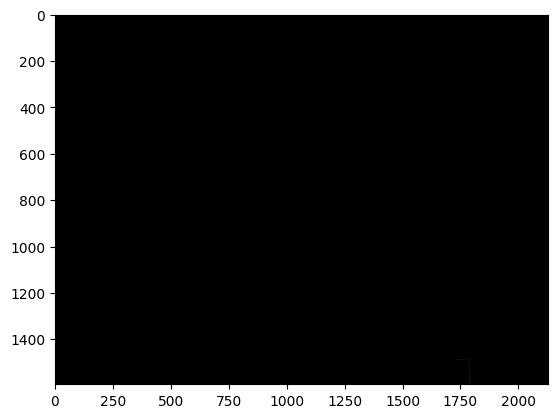

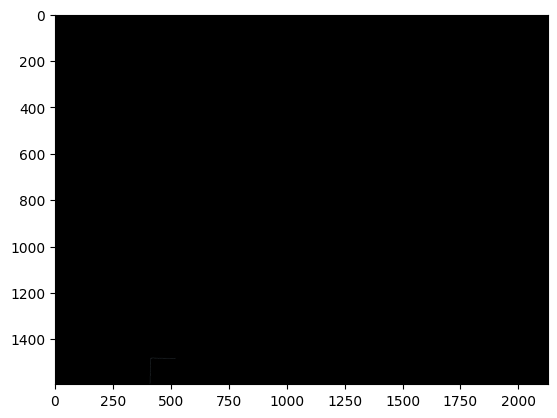

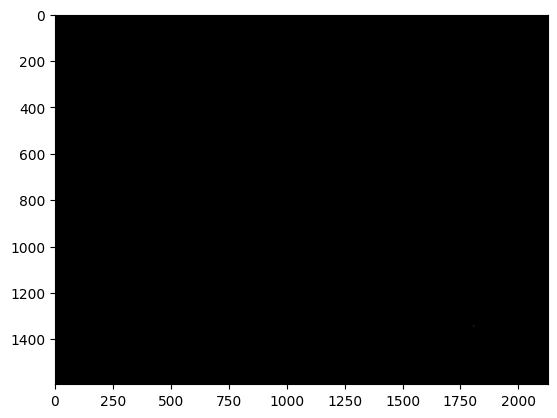

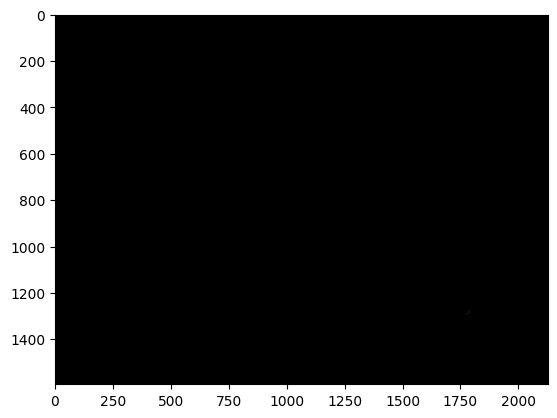

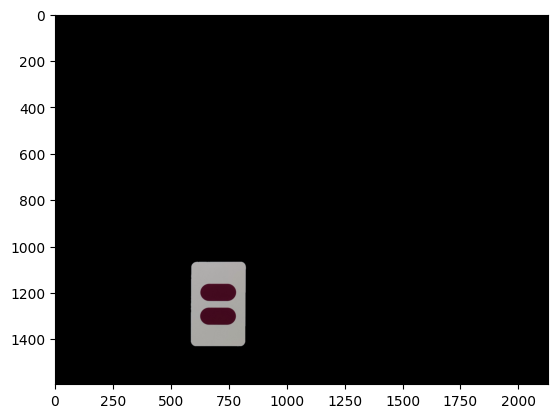

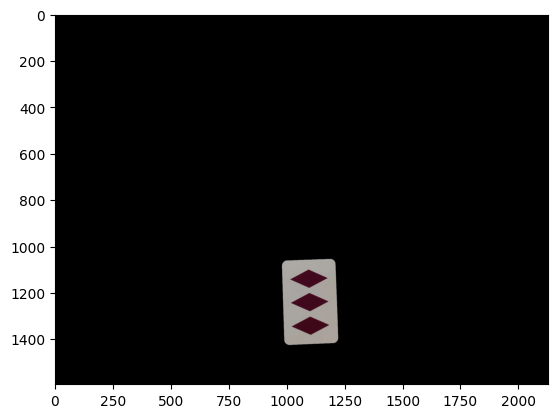

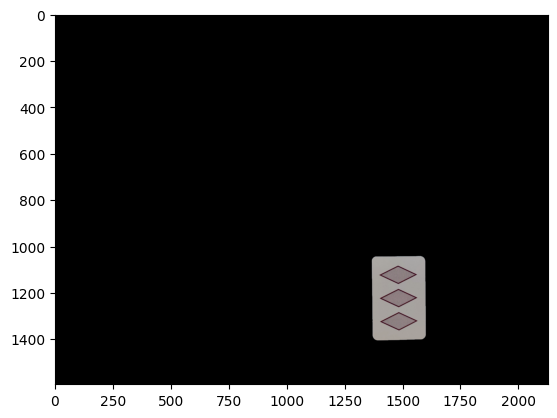

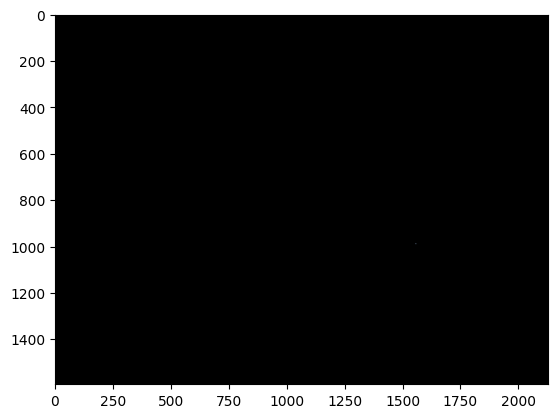

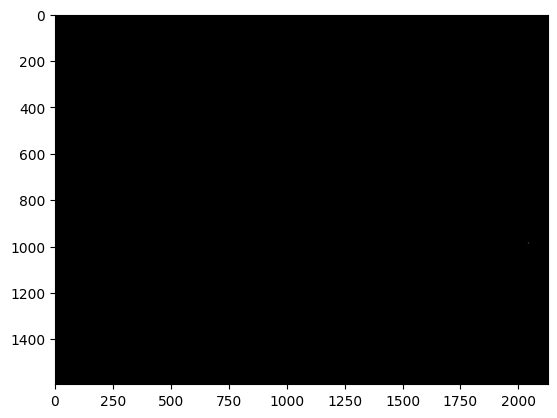

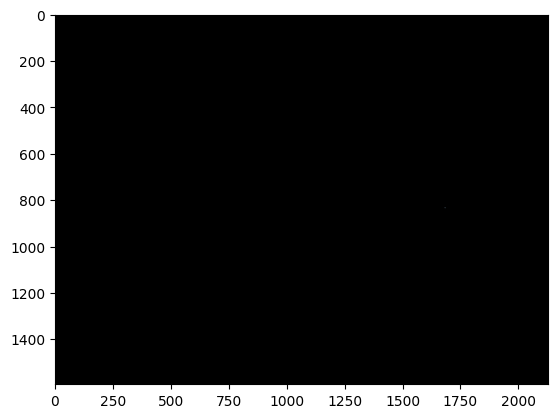

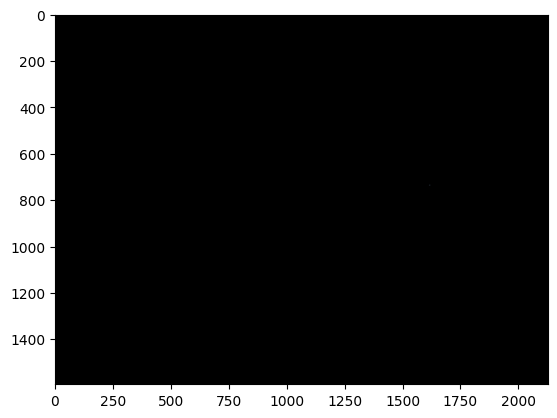

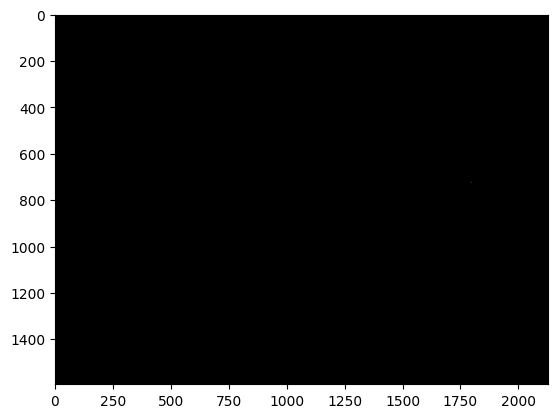

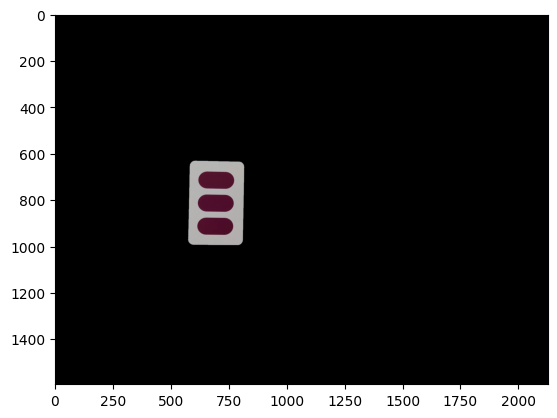

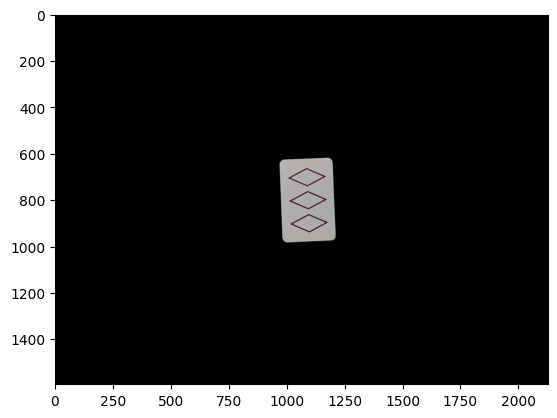

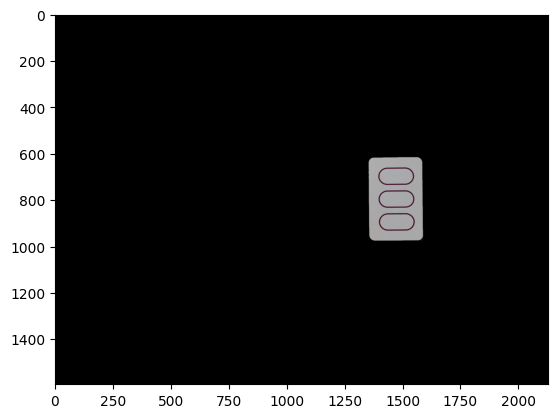

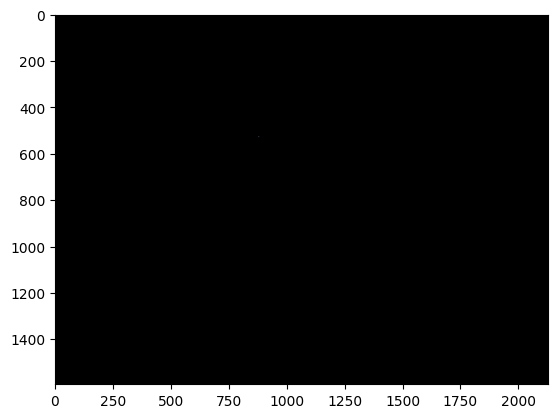

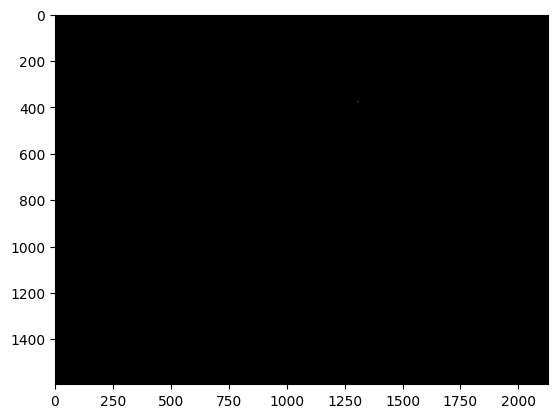

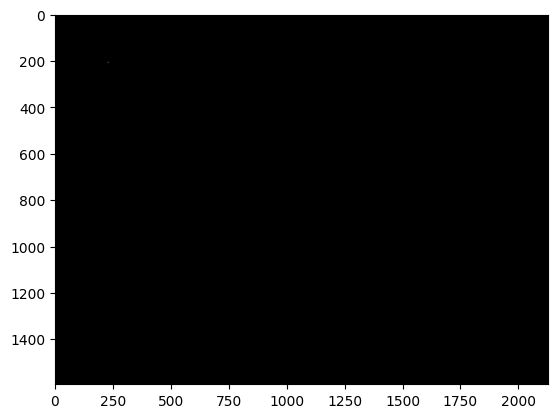

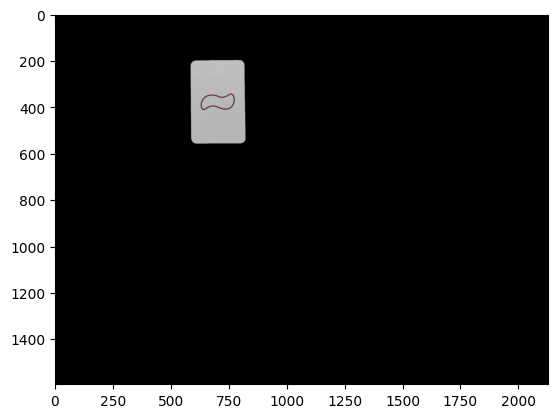

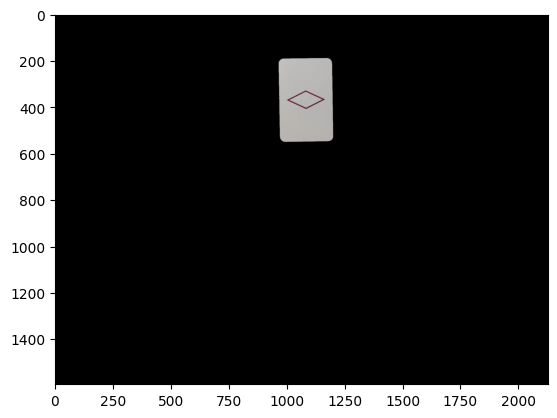

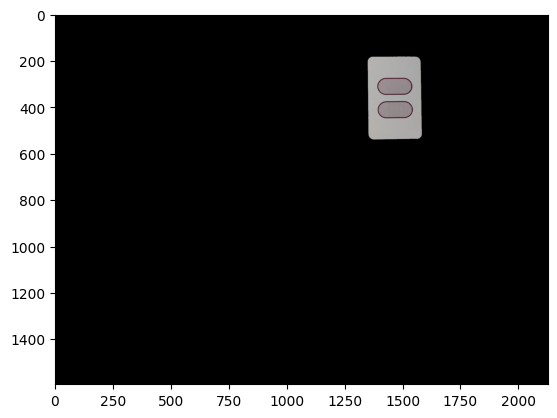

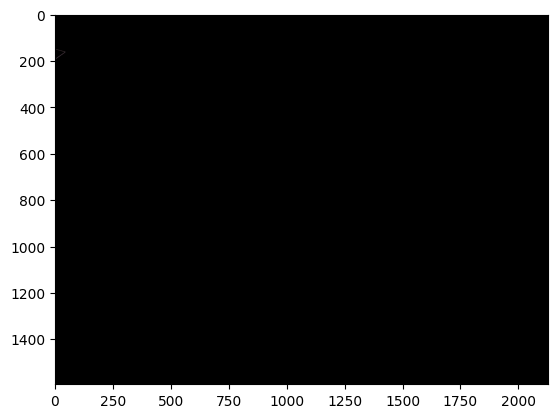

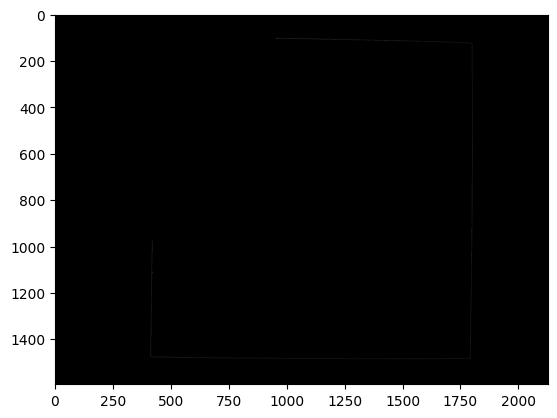

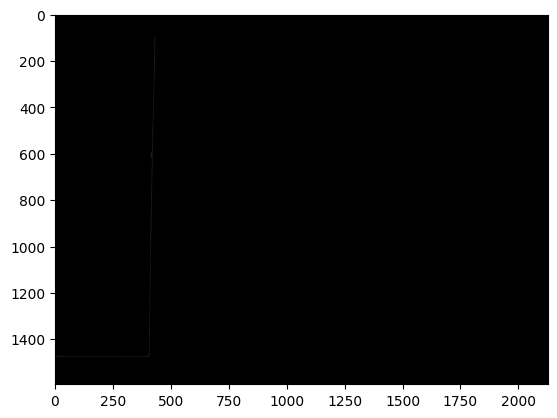

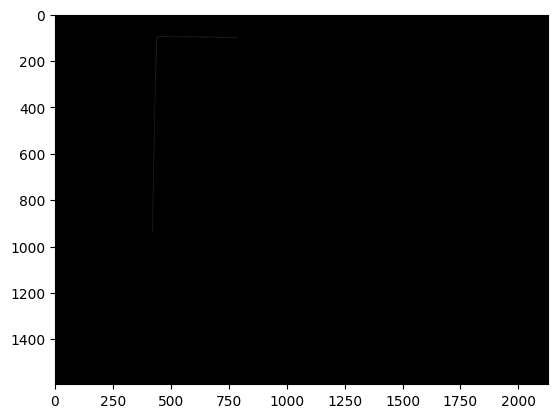

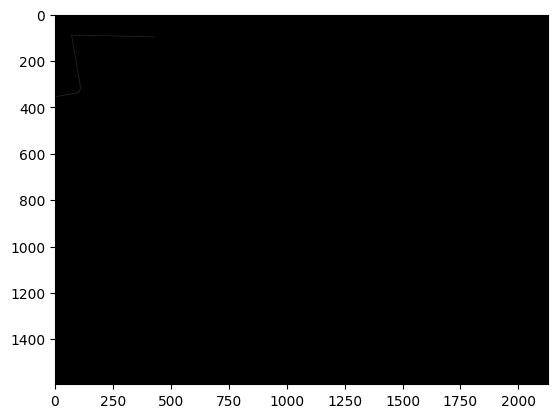

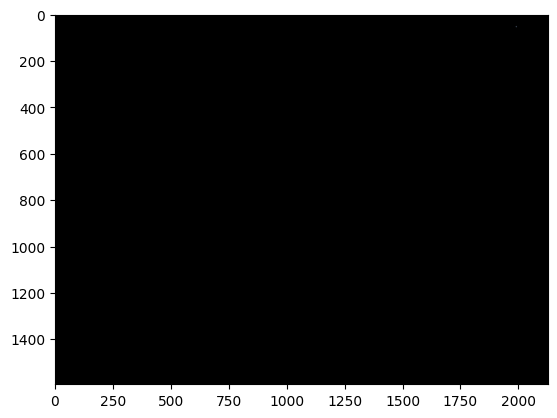

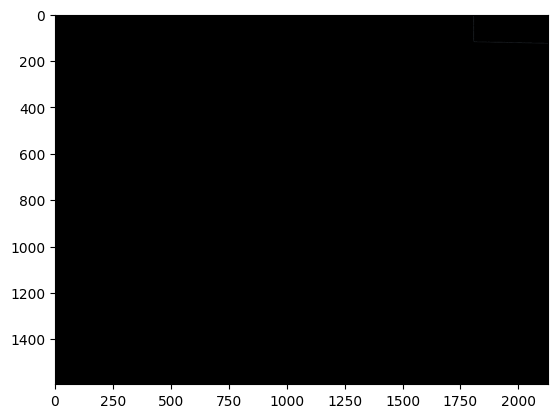

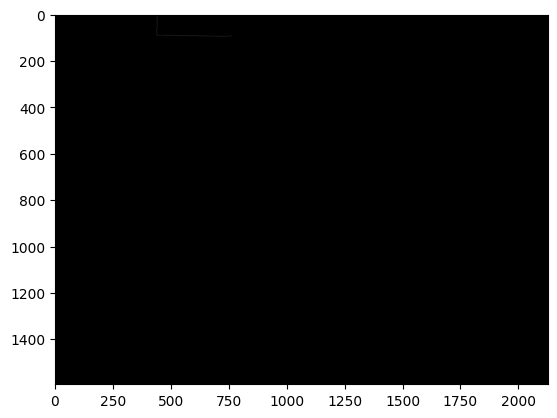

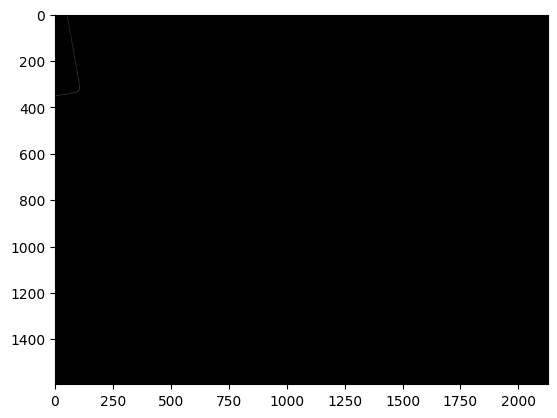

In [15]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
  
# Load an image 
 
img = cv2.imread("./downloads/T2.jpg") 
plt.imshow(img)
plt.show()
 
# Convert the image to grayscale 
 
 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
 
 
# Apply Gaussian blur to reduce noise 
 
 
blurred = cv2.GaussianBlur(gray, (5, 5), 0) 
 
# Perform Canny edge detection 

 
edges = cv2.Canny(blurred, 50, 150) 
 
# Find contours in the edges image 
plt.imshow(edges, cmap='gray')
plt.show()
 
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
 
 
# Iterate over each contour 
 
 
for contour in contours: 
 
 
    # Approximate the contour to a polygon 
    mask = np.zeros(img.shape[:2], np.uint8)
    polygon = cv2.approxPolyDP(contour, 0.1 * cv2.arcLength(contour, True), True) 
 
 
    # Check if the polygon has 4 sides 
 
 
    if len(polygon) == 4: 
 
 
        # Draw the rectangle on the image 
 
 
        x, y, w, h = cv2.boundingRect(polygon) 
 
        cv2.rectangle(mask, (x, y), (x + w, y + h), (0, 255, 0), 2) 

        cv2.drawContours(mask, [contour],-1, 255, -1)
        masked = cv2.bitwise_and(img, img, mask=mask)
 
# Show the result 
        plt.imshow(masked)
        plt.show()
#cv2.imshow("Result", img) 
 
#cv2.waitKey(0) 
 
#cv2.destroyAllWindows() 